In [8]:
import numpy as np
import numpy.ma as ma
import matplotlib.pyplot as plt
plt.style.use('science')
import scipy.io

In [5]:
image_1 = scipy.io.readsav("../raw_data/sumer/20071116/level1/sum_r_20071116_09011087.0338_l1.sav")["image_lvl1"]
image_2 = scipy.io.readsav("../raw_data/sumer/20071116/level1/sum_r_20071116_09061087.0338_l1.sav")["image_lvl1"]
image_3 = scipy.io.readsav("../raw_data/sumer/20071116/level1/sum_r_20071116_09111087.0338_l1.sav")["image_lvl1"]

In [12]:
image_1.shape

(360, 1024)

In [9]:
#A function to average every N rows...
def avg_new(my_array, N=2):
    return ma.mean(my_array.reshape(-1,N,my_array.shape[-1]),axis=1)

def avg_err(my_array, N=2):
    my_reshape_sq = np.square(my_array.reshape(-1,N,my_array.shape[-1]))
    mask_reshape_sq = np.logical_not(my_reshape_sq.mask) * 1
    return np.sqrt(ma.sum(my_reshape_sq, axis = 1))/ma.sum(mask_reshape_sq, axis = 1)

In [20]:
FeXI_680_1 = avg_new(image_1[6:306,192-22:192+14],N=30)
FeXI_680_2 = avg_new(image_2[6:306,192-22:192+14],N=30)
FeXI_680_3 = avg_new(image_3[6:306,192-22:192+14],N=30)

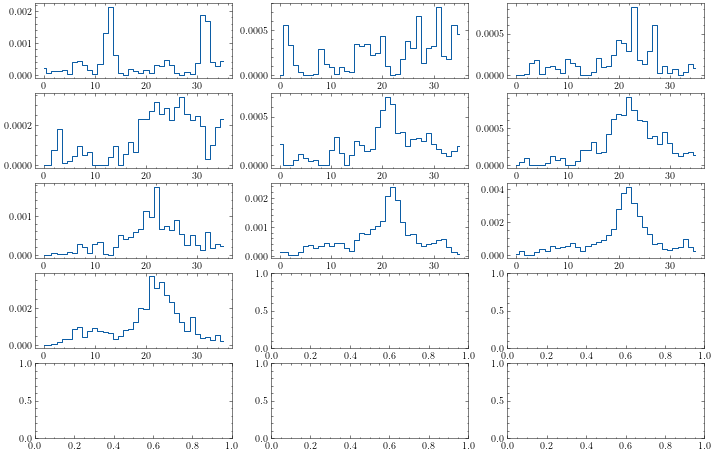

In [19]:
fig, axes = plt.subplots(5,3,figsize=(12,8))
for ii in range(10):
    axes.flatten()[ii].step(np.arange(36),FeXI_680_1[ii,:],where="mid")

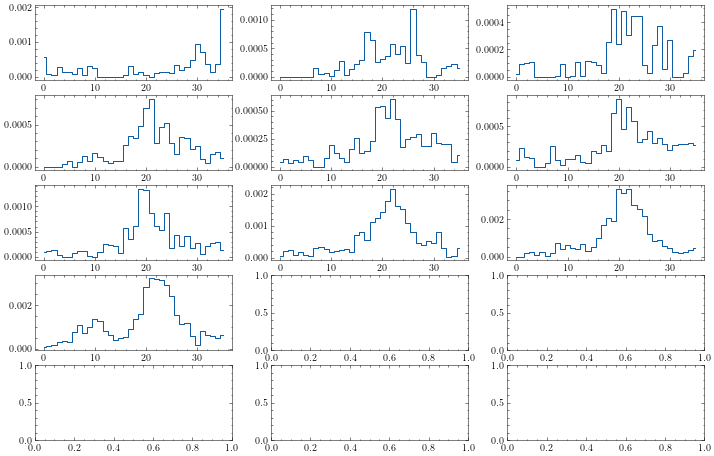

In [21]:
fig, axes = plt.subplots(5,3,figsize=(12,8))
for ii in range(10):
    axes.flatten()[ii].step(np.arange(36),FeXI_680_2[ii,:],where="mid")

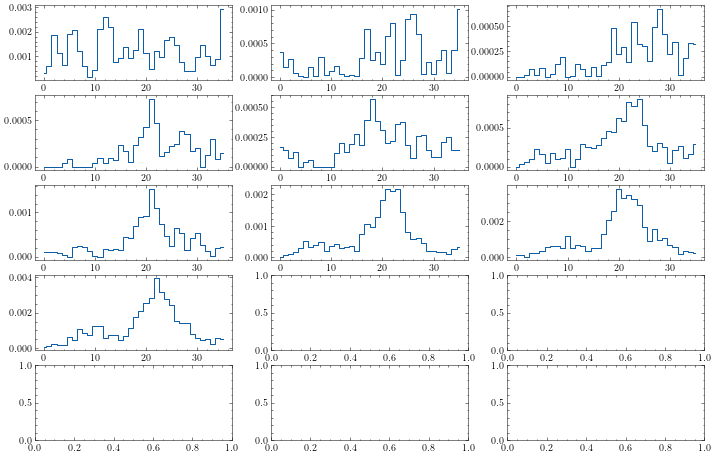

In [22]:
fig, axes = plt.subplots(5,3,figsize=(12,8))
for ii in range(10):
    axes.flatten()[ii].step(np.arange(36),FeXI_680_3[ii,:],where="mid")